In [1]:
import pandas as pd
import numpy as np

In [2]:
resume_df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
resume_df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
Category    962 non-null object
Resume      962 non-null object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
resume_df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
for i in range(len(resume_df)):
    if resume_df['Category'][i]=='Data Science':
        resume_df['Category'][i]=0
    elif resume_df['Category'][i]=='HR':
        resume_df['Category'][i]=1
    elif resume_df['Category'][i]=='Advocate':
        resume_df['Category'][i]=2
    elif resume_df['Category'][i]=='Arts':
        resume_df['Category'][i]=3
    elif resume_df['Category'][i]=='Web Designing':
        resume_df['Category'][i]=4
    elif resume_df['Category'][i]=='Mechanical Engineer':
        resume_df['Category'][i]=5
    elif resume_df['Category'][i]=='Sales':
        resume_df['Category'][i]=6
    elif resume_df['Category'][i]=='Health and fitness':
        resume_df['Category'][i]=7
    elif resume_df['Category'][i]=='Civil Engineer':
        resume_df['Category'][i]=8
    elif resume_df['Category'][i]=='Java Developer':
        resume_df['Category'][i]=9
    elif resume_df['Category'][i]=='Business Analyst':
        resume_df['Category'][i]=10
    elif resume_df['Category'][i]=='SAP Developer':
        resume_df['Category'][i]=11
    elif resume_df['Category'][i]=='Automation Testing':
        resume_df['Category'][i]=12
    elif resume_df['Category'][i]=='Electrical Engineering':
        resume_df['Category'][i]=13
    elif resume_df['Category'][i]=='Operations Manager':
        resume_df['Category'][i]=14
    elif resume_df['Category'][i]=='Python Developer':
        resume_df['Category'][i]=15
    elif resume_df['Category'][i]=='DevOps Engineer':
        resume_df['Category'][i]=16
    elif resume_df['Category'][i]=='Network Security Engineer':
        resume_df['Category'][i]=17
    elif resume_df['Category'][i]=='PMO':
        resume_df['Category'][i]=18
    elif resume_df['Category'][i]=='Database':
        resume_df['Category'][i]=19
    elif resume_df['Category'][i]=='Hadoop':
        resume_df['Category'][i]=20
    elif resume_df['Category'][i]=='ETL Developer':
        resume_df['Category'][i]=21
    elif resume_df['Category'][i]=='DotNet Developer':
        resume_df['Category'][i]=22
    elif resume_df['Category'][i]=='Blockchain':
        resume_df['Category'][i]=23
    elif resume_df['Category'][i]=='Testing':
        resume_df['Category'][i]=24

In [7]:
resume_df['Category']

0       0
1       0
2       0
3       0
4       0
       ..
957    24
958    24
959    24
960    24
961    24
Name: Category, Length: 962, dtype: object

In [8]:
resume_df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [9]:
resume_df['Category'].value_counts()

9     84
24    70
16    55
15    48
4     45
1     44
20    42
23    40
5     40
6     40
0     40
14    40
21    40
3     36
19    33
13    30
7     30
18    30
10    28
22    28
12    26
17    25
11    24
8     24
2     20
Name: Category, dtype: int64

In [10]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rituraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [12]:
resume_df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [13]:
corpus=[]
for i in range(0,len(resume_df)):
    resume = re.sub('[^a-zA-Z]',' ',resume_df['Resume'][i])
    resume = resume.lower()
    resume = resume.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    resume = [ps.stem(word) for word in resume if not word in set(all_stopwords)]
    resume = ' '.join(resume)
    wordfreqdist = nltk.FreqDist(resume)
    mostcommon = wordfreqdist.most_common(50)
    print(mostcommon)
    corpus.append(resume)

[(' ', 501), ('e', 290), ('a', 250), ('t', 243), ('r', 221), ('s', 202), ('i', 197), ('o', 197), ('n', 174), ('l', 153), ('c', 135), ('d', 111), ('u', 96), ('p', 94), ('m', 91), ('f', 57), ('v', 54), ('g', 47), ('h', 46), ('y', 38), ('b', 35), ('k', 21), ('w', 20), ('q', 19), ('j', 15), ('x', 11), ('z', 1)]
[(' ', 129), ('e', 93), ('a', 71), ('t', 65), ('r', 55), ('i', 53), ('s', 50), ('l', 41), ('o', 41), ('m', 40), ('n', 40), ('c', 34), ('p', 30), ('d', 25), ('h', 22), ('u', 18), ('y', 13), ('b', 13), ('x', 10), ('k', 9), ('g', 7), ('f', 6), ('v', 4), ('w', 3)]
[(' ', 190), ('e', 129), ('a', 106), ('t', 93), ('n', 89), ('i', 80), ('r', 76), ('s', 62), ('c', 58), ('o', 56), ('l', 50), ('m', 48), ('p', 45), ('h', 39), ('u', 29), ('d', 27), ('g', 25), ('y', 24), ('b', 22), ('w', 12), ('k', 12), ('x', 11), ('v', 9), ('f', 7), ('j', 7), ('q', 3)]
[(' ', 720), ('e', 418), ('a', 361), ('t', 313), ('r', 308), ('o', 291), ('n', 291), ('i', 282), ('s', 232), ('l', 228), ('c', 202), ('p', 180),

[(' ', 48), ('a', 34), ('e', 33), ('s', 21), ('n', 21), ('t', 20), ('i', 19), ('r', 19), ('c', 18), ('l', 12), ('p', 12), ('d', 11), ('m', 11), ('o', 11), ('y', 10), ('h', 10), ('x', 6), ('u', 4), ('b', 2), ('f', 1), ('k', 1), ('j', 1), ('v', 1), ('g', 1), ('w', 1)]
[(' ', 80), ('e', 48), ('a', 44), ('c', 36), ('i', 33), ('t', 33), ('n', 32), ('s', 31), ('r', 30), ('o', 26), ('l', 23), ('m', 19), ('h', 15), ('d', 14), ('p', 13), ('u', 9), ('y', 8), ('f', 7), ('g', 7), ('x', 6), ('b', 5), ('k', 3), ('w', 3), ('j', 2)]
[(' ', 171), ('a', 104), ('e', 86), ('t', 77), ('n', 70), ('i', 69), ('c', 61), ('s', 60), ('l', 58), ('o', 58), ('r', 45), ('u', 40), ('d', 38), ('p', 35), ('m', 28), ('h', 22), ('b', 16), ('v', 11), ('x', 10), ('g', 9), ('y', 8), ('k', 6), ('f', 6), ('w', 6), ('j', 3), ('z', 2), ('q', 2)]
[(' ', 822), ('e', 515), ('i', 363), ('r', 363), ('n', 361), ('a', 356), ('t', 345), ('l', 301), ('o', 269), ('s', 248), ('c', 200), ('p', 184), ('m', 162), ('u', 133), ('d', 131), ('g'

[(' ', 19), ('a', 10), ('i', 9), ('n', 9), ('e', 8), ('d', 7), ('c', 7), ('t', 7), ('l', 7), ('m', 5), ('o', 5), ('u', 4), ('h', 4), ('s', 4), ('r', 3), ('p', 3), ('y', 2), ('b', 2), ('j', 1), ('v', 1), ('k', 1)]
[(' ', 14), ('e', 10), ('i', 10), ('o', 7), ('n', 7), ('c', 6), ('a', 6), ('l', 6), ('s', 6), ('d', 5), ('t', 5), ('p', 5), ('r', 5), ('m', 5), ('u', 3), ('b', 2), ('v', 2), ('h', 2), ('f', 1), ('k', 1), ('x', 1)]
[(' ', 15), ('i', 9), ('a', 8), ('e', 7), ('l', 7), ('c', 6), ('t', 6), ('d', 5), ('n', 5), ('s', 5), ('m', 4), ('o', 3), ('g', 3), ('r', 3), ('p', 3), ('h', 2), ('u', 1), ('b', 1), ('k', 1)]
[(' ', 103), ('e', 56), ('a', 51), ('n', 47), ('r', 46), ('i', 43), ('m', 39), ('c', 37), ('t', 35), ('o', 32), ('l', 27), ('u', 22), ('d', 21), ('s', 18), ('p', 15), ('h', 13), ('g', 11), ('f', 8), ('b', 8), ('k', 7), ('v', 7), ('x', 6), ('w', 5), ('j', 5), ('y', 3), ('q', 2)]
[(' ', 54), ('a', 36), ('i', 29), ('r', 26), ('e', 26), ('c', 23), ('l', 23), ('o', 23), ('t', 21), ('

[(' ', 45), ('a', 39), ('r', 26), ('i', 20), ('e', 17), ('c', 17), ('t', 16), ('m', 15), ('o', 14), ('h', 12), ('n', 11), ('d', 10), ('l', 10), ('s', 9), ('u', 8), ('g', 6), ('k', 5), ('p', 5), ('y', 5), ('j', 3), ('f', 3), ('b', 3), ('w', 3), ('v', 1)]
[(' ', 62), ('a', 57), ('t', 32), ('r', 30), ('e', 28), ('i', 28), ('d', 18), ('s', 18), ('m', 18), ('l', 17), ('n', 17), ('o', 16), ('p', 15), ('h', 14), ('c', 12), ('u', 9), ('b', 7), ('k', 6), ('g', 4), ('j', 3), ('f', 2), ('y', 2), ('w', 2), ('v', 1)]
[(' ', 117), ('a', 93), ('r', 62), ('s', 54), ('e', 52), ('i', 50), ('t', 50), ('o', 43), ('n', 38), ('l', 30), ('m', 28), ('c', 27), ('d', 26), ('h', 26), ('p', 24), ('g', 13), ('k', 11), ('u', 7), ('b', 7), ('f', 7), ('j', 5), ('w', 4), ('x', 4), ('y', 3), ('v', 3), ('q', 1)]
[(' ', 166), ('a', 83), ('e', 74), ('o', 66), ('r', 66), ('n', 63), ('i', 59), ('l', 58), ('t', 57), ('c', 48), ('s', 48), ('p', 41), ('m', 40), ('u', 37), ('d', 32), ('h', 31), ('g', 28), ('k', 24), ('y', 14), 

[(' ', 351), ('e', 196), ('a', 164), ('t', 162), ('r', 150), ('s', 149), ('o', 147), ('i', 140), ('p', 127), ('n', 117), ('c', 115), ('l', 89), ('m', 72), ('d', 69), ('u', 55), ('h', 54), ('g', 48), ('b', 44), ('v', 29), ('w', 21), ('j', 20), ('k', 16), ('f', 14), ('y', 9), ('x', 9), ('q', 6), ('z', 3)]
[(' ', 385), ('e', 195), ('a', 194), ('t', 182), ('s', 180), ('i', 153), ('o', 152), ('p', 143), ('r', 139), ('c', 98), ('l', 90), ('n', 78), ('d', 70), ('u', 70), ('h', 55), ('m', 54), ('v', 46), ('b', 37), ('j', 37), ('f', 32), ('g', 31), ('w', 22), ('y', 22), ('q', 18), ('x', 14), ('k', 12), ('z', 8)]
[(' ', 351), ('e', 196), ('a', 164), ('t', 162), ('r', 150), ('s', 149), ('o', 147), ('i', 140), ('p', 127), ('n', 117), ('c', 115), ('l', 89), ('m', 72), ('d', 69), ('u', 55), ('h', 54), ('g', 48), ('b', 44), ('v', 29), ('w', 21), ('j', 20), ('k', 16), ('f', 14), ('y', 9), ('x', 9), ('q', 6), ('z', 3)]
[(' ', 77), ('a', 58), ('e', 44), ('i', 39), ('r', 34), ('t', 31), ('n', 31), ('s', 

[(' ', 164), ('i', 88), ('a', 86), ('n', 81), ('r', 71), ('t', 68), ('e', 64), ('c', 56), ('o', 49), ('d', 45), ('m', 42), ('s', 39), ('p', 39), ('u', 35), ('h', 29), ('l', 28), ('g', 21), ('k', 11), ('f', 11), ('w', 10), ('y', 9), ('x', 9), ('b', 7), ('j', 6), ('v', 2), ('q', 1), ('z', 1)]
[(' ', 60), ('e', 34), ('i', 32), ('a', 31), ('n', 31), ('t', 29), ('c', 26), ('s', 21), ('r', 19), ('o', 19), ('m', 19), ('d', 15), ('p', 15), ('l', 13), ('u', 12), ('h', 12), ('g', 10), ('b', 5), ('j', 2), ('k', 2), ('f', 1), ('y', 1), ('w', 1), ('x', 1)]
[(' ', 210), ('e', 140), ('a', 113), ('r', 92), ('n', 91), ('t', 85), ('i', 81), ('s', 75), ('o', 68), ('c', 64), ('l', 54), ('p', 47), ('d', 44), ('u', 44), ('m', 36), ('g', 33), ('h', 29), ('w', 21), ('v', 20), ('k', 17), ('f', 14), ('b', 10), ('y', 10), ('x', 7), ('j', 4), ('q', 1)]
[(' ', 126), ('a', 83), ('e', 62), ('n', 60), ('i', 56), ('r', 55), ('t', 50), ('o', 43), ('s', 39), ('c', 39), ('m', 35), ('l', 30), ('u', 29), ('h', 27), ('d', 2

[(' ', 100), ('a', 58), ('e', 49), ('i', 42), ('l', 42), ('o', 41), ('n', 37), ('t', 34), ('s', 32), ('r', 30), ('m', 27), ('c', 27), ('u', 20), ('g', 17), ('p', 15), ('d', 14), ('b', 13), ('k', 10), ('v', 10), ('f', 9), ('h', 6), ('w', 5), ('j', 3), ('y', 2), ('x', 1)]
[(' ', 85), ('e', 58), ('a', 51), ('r', 44), ('c', 33), ('s', 32), ('i', 31), ('o', 30), ('l', 29), ('n', 29), ('t', 23), ('d', 20), ('m', 20), ('h', 17), ('p', 17), ('u', 9), ('g', 7), ('k', 7), ('y', 7), ('x', 5), ('b', 3), ('f', 3), ('w', 2), ('v', 2), ('j', 1)]
[(' ', 108), ('a', 66), ('e', 57), ('n', 44), ('s', 43), ('t', 41), ('i', 36), ('l', 34), ('o', 34), ('c', 31), ('m', 30), ('r', 27), ('d', 21), ('p', 16), ('k', 13), ('f', 12), ('h', 12), ('g', 11), ('b', 10), ('j', 8), ('x', 7), ('u', 6), ('w', 6), ('v', 3), ('y', 2), ('q', 1)]
[(' ', 376), ('e', 257), ('a', 180), ('r', 177), ('t', 165), ('i', 143), ('o', 139), ('l', 122), ('n', 121), ('s', 112), ('m', 91), ('p', 87), ('c', 78), ('g', 56), ('d', 56), ('u', 

[(' ', 56), ('e', 33), ('i', 31), ('a', 28), ('l', 25), ('r', 24), ('t', 21), ('s', 19), ('o', 19), ('n', 17), ('c', 16), ('m', 12), ('h', 11), ('p', 11), ('d', 9), ('f', 9), ('u', 8), ('g', 8), ('v', 4), ('y', 3), ('j', 2), ('b', 2), ('k', 2), ('q', 1), ('x', 1)]
[(' ', 92), ('i', 59), ('a', 51), ('e', 47), ('r', 43), ('o', 40), ('t', 39), ('n', 37), ('l', 35), ('c', 34), ('u', 26), ('s', 22), ('d', 20), ('p', 19), ('g', 16), ('m', 15), ('h', 13), ('b', 13), ('v', 9), ('f', 7), ('y', 5), ('w', 4), ('k', 4), ('j', 3), ('x', 1)]
[(' ', 258), ('e', 134), ('a', 131), ('r', 116), ('o', 115), ('t', 109), ('i', 100), ('n', 82), ('l', 77), ('s', 72), ('p', 70), ('m', 62), ('c', 54), ('d', 53), ('h', 48), ('u', 35), ('f', 27), ('g', 26), ('b', 17), ('k', 15), ('y', 14), ('w', 12), ('v', 9), ('q', 7), ('j', 6), ('x', 3), ('z', 1)]
[(' ', 271), ('e', 149), ('i', 136), ('t', 131), ('a', 121), ('r', 110), ('o', 90), ('c', 87), ('n', 85), ('s', 80), ('p', 77), ('l', 64), ('m', 59), ('d', 48), ('u',

[(' ', 29), ('a', 23), ('e', 16), ('t', 16), ('i', 12), ('l', 12), ('d', 10), ('s', 10), ('o', 10), ('p', 10), ('c', 9), ('r', 8), ('n', 8), ('m', 7), ('v', 7), ('u', 6), ('j', 6), ('h', 6), ('g', 2), ('y', 2), ('b', 2), ('k', 2), ('w', 2), ('x', 1), ('f', 1)]
[(' ', 248), ('e', 141), ('a', 139), ('t', 111), ('r', 108), ('n', 107), ('i', 100), ('s', 90), ('o', 88), ('c', 69), ('l', 69), ('p', 67), ('m', 56), ('u', 45), ('d', 41), ('g', 32), ('v', 30), ('h', 24), ('k', 23), ('j', 22), ('f', 19), ('b', 18), ('w', 14), ('y', 14), ('x', 10), ('q', 7)]
[(' ', 236), ('e', 125), ('o', 110), ('t', 100), ('i', 94), ('a', 89), ('l', 88), ('s', 81), ('r', 72), ('n', 70), ('c', 68), ('p', 66), ('d', 58), ('m', 41), ('u', 41), ('v', 34), ('b', 25), ('h', 20), ('f', 19), ('g', 18), ('k', 17), ('w', 17), ('x', 14), ('j', 13), ('q', 7), ('y', 3), ('z', 2)]
[(' ', 260), ('e', 148), ('a', 124), ('r', 99), ('t', 95), ('s', 95), ('i', 94), ('o', 82), ('n', 78), ('l', 76), ('c', 60), ('m', 54), ('d', 47), 

[(' ', 236), ('e', 125), ('o', 110), ('t', 100), ('i', 94), ('a', 89), ('l', 88), ('s', 81), ('r', 72), ('n', 70), ('c', 68), ('p', 66), ('d', 58), ('m', 41), ('u', 41), ('v', 34), ('b', 25), ('h', 20), ('f', 19), ('g', 18), ('k', 17), ('w', 17), ('x', 14), ('j', 13), ('q', 7), ('y', 3), ('z', 2)]
[(' ', 260), ('e', 148), ('a', 124), ('r', 99), ('t', 95), ('s', 95), ('i', 94), ('o', 82), ('n', 78), ('l', 76), ('c', 60), ('m', 54), ('d', 47), ('p', 46), ('v', 44), ('u', 43), ('h', 38), ('b', 25), ('g', 22), ('j', 21), ('y', 20), ('f', 17), ('k', 14), ('w', 13), ('q', 9), ('x', 9), ('z', 2)]
[(' ', 160), ('a', 120), ('e', 73), ('r', 70), ('o', 66), ('n', 57), ('t', 56), ('c', 53), ('i', 52), ('d', 49), ('p', 41), ('s', 39), ('l', 36), ('m', 27), ('h', 27), ('u', 26), ('g', 22), ('j', 20), ('v', 19), ('b', 11), ('f', 8), ('k', 6), ('w', 4), ('x', 3), ('y', 3), ('q', 2)]
[(' ', 104), ('e', 68), ('a', 44), ('r', 36), ('i', 33), ('n', 33), ('p', 30), ('c', 29), ('t', 28), ('s', 28), ('o', 27

[(' ', 104), ('e', 68), ('a', 44), ('r', 36), ('i', 33), ('n', 33), ('p', 30), ('c', 29), ('t', 28), ('s', 28), ('o', 27), ('l', 25), ('d', 21), ('j', 21), ('v', 17), ('m', 16), ('h', 15), ('x', 13), ('g', 12), ('u', 10), ('y', 7), ('b', 5), ('q', 3), ('k', 2), ('w', 2), ('f', 2)]
[(' ', 135), ('e', 81), ('a', 73), ('n', 61), ('s', 55), ('i', 53), ('t', 51), ('r', 48), ('o', 48), ('c', 43), ('l', 39), ('p', 39), ('h', 33), ('m', 32), ('j', 24), ('v', 22), ('u', 19), ('g', 17), ('d', 15), ('x', 15), ('k', 12), ('w', 11), ('b', 9), ('y', 6), ('q', 4), ('f', 3), ('z', 2)]
[(' ', 135), ('e', 81), ('a', 73), ('n', 61), ('s', 55), ('i', 53), ('t', 51), ('r', 48), ('o', 48), ('c', 43), ('l', 39), ('p', 39), ('h', 33), ('m', 32), ('j', 24), ('v', 22), ('u', 19), ('g', 17), ('d', 15), ('x', 15), ('k', 12), ('w', 11), ('b', 9), ('y', 6), ('q', 4), ('f', 3), ('z', 2)]
[(' ', 200), ('e', 113), ('a', 108), ('r', 84), ('s', 79), ('n', 79), ('t', 77), ('o', 76), ('i', 64), ('c', 64), ('l', 51), ('p',

[(' ', 168), ('a', 110), ('r', 84), ('i', 82), ('e', 81), ('o', 67), ('s', 64), ('n', 63), ('t', 56), ('c', 50), ('p', 49), ('m', 48), ('l', 45), ('u', 36), ('h', 31), ('d', 29), ('v', 18), ('g', 16), ('j', 15), ('b', 14), ('f', 12), ('k', 11), ('w', 10), ('x', 7), ('y', 6), ('q', 3), ('z', 1)]
[(' ', 161), ('a', 90), ('r', 83), ('e', 81), ('i', 76), ('t', 65), ('o', 56), ('n', 55), ('c', 51), ('s', 51), ('m', 44), ('p', 41), ('d', 38), ('l', 34), ('u', 20), ('b', 17), ('h', 15), ('f', 12), ('k', 11), ('g', 9), ('v', 7), ('y', 5), ('w', 5), ('x', 4), ('q', 2), ('j', 1)]
[(' ', 668), ('e', 382), ('i', 334), ('t', 330), ('a', 312), ('r', 279), ('s', 266), ('n', 232), ('c', 227), ('o', 213), ('p', 174), ('l', 162), ('m', 145), ('d', 124), ('u', 122), ('g', 80), ('f', 62), ('h', 61), ('v', 58), ('b', 44), ('k', 34), ('y', 34), ('w', 34), ('q', 19), ('x', 19), ('j', 19), ('z', 2)]
[(' ', 1060), ('e', 702), ('t', 536), ('r', 517), ('i', 456), ('o', 456), ('a', 425), ('s', 406), ('n', 360), (

[(' ', 455), ('a', 226), ('t', 221), ('e', 217), ('i', 197), ('r', 182), ('o', 179), ('c', 160), ('n', 156), ('l', 155), ('s', 130), ('m', 111), ('d', 95), ('p', 95), ('u', 93), ('g', 53), ('h', 47), ('w', 40), ('v', 40), ('k', 34), ('b', 34), ('f', 32), ('y', 16), ('j', 8), ('x', 8), ('q', 5)]
[(' ', 446), ('e', 312), ('t', 229), ('r', 180), ('s', 177), ('i', 173), ('o', 167), ('a', 166), ('n', 151), ('l', 113), ('p', 112), ('c', 111), ('m', 98), ('u', 82), ('d', 75), ('v', 68), ('g', 38), ('j', 36), ('b', 31), ('w', 26), ('f', 26), ('h', 25), ('y', 20), ('k', 17), ('x', 13), ('q', 6), ('z', 4)]
[(' ', 737), ('e', 418), ('t', 408), ('r', 306), ('i', 287), ('a', 278), ('o', 271), ('s', 264), ('n', 229), ('c', 215), ('l', 189), ('p', 176), ('m', 144), ('u', 143), ('d', 131), ('g', 85), ('v', 80), ('h', 60), ('f', 60), ('b', 58), ('q', 47), ('x', 34), ('w', 33), ('k', 30), ('y', 22), ('j', 6), ('z', 1)]
[(' ', 241), ('e', 152), ('t', 133), ('a', 112), ('o', 103), ('n', 94), ('s', 92), ('

[(' ', 46), ('e', 34), ('i', 33), ('c', 24), ('a', 21), ('n', 20), ('t', 17), ('r', 17), ('d', 15), ('l', 15), ('o', 14), ('f', 11), ('m', 10), ('s', 9), ('p', 8), ('u', 7), ('g', 7), ('h', 5), ('k', 4), ('w', 4), ('x', 2), ('v', 2), ('b', 1)]
[(' ', 462), ('e', 257), ('t', 216), ('a', 211), ('r', 208), ('i', 173), ('n', 165), ('l', 163), ('c', 153), ('o', 150), ('s', 135), ('p', 114), ('m', 95), ('d', 81), ('u', 70), ('v', 53), ('h', 49), ('g', 49), ('b', 40), ('f', 34), ('w', 33), ('y', 19), ('k', 14), ('j', 8), ('q', 5), ('x', 4)]
[(' ', 61), ('e', 37), ('a', 33), ('i', 33), ('l', 28), ('r', 27), ('t', 26), ('n', 23), ('s', 23), ('p', 17), ('c', 16), ('o', 15), ('m', 14), ('d', 13), ('h', 11), ('u', 10), ('b', 9), ('g', 8), ('y', 5), ('v', 4), ('w', 3), ('j', 2), ('k', 1), ('x', 1)]
[(' ', 249), ('e', 141), ('t', 124), ('r', 121), ('a', 111), ('i', 101), ('n', 84), ('o', 81), ('c', 78), ('l', 75), ('s', 55), ('p', 54), ('m', 46), ('u', 45), ('h', 30), ('k', 29), ('v', 28), ('d', 27)

[(' ', 679), ('e', 400), ('r', 333), ('i', 315), ('a', 308), ('t', 285), ('n', 264), ('o', 246), ('c', 216), ('s', 204), ('p', 202), ('m', 181), ('l', 157), ('d', 137), ('u', 110), ('v', 63), ('g', 60), ('f', 59), ('b', 48), ('h', 46), ('k', 45), ('x', 27), ('y', 26), ('w', 17), ('q', 16), ('z', 9), ('j', 4)]
[(' ', 1239), ('e', 706), ('r', 664), ('i', 631), ('o', 562), ('a', 541), ('t', 540), ('n', 486), ('s', 438), ('c', 394), ('p', 357), ('l', 310), ('u', 263), ('m', 260), ('d', 253), ('h', 156), ('v', 134), ('g', 127), ('f', 111), ('b', 69), ('k', 63), ('w', 53), ('x', 30), ('y', 24), ('q', 18), ('j', 17), ('z', 3)]
[(' ', 1483), ('e', 957), ('t', 665), ('r', 612), ('o', 577), ('i', 546), ('a', 537), ('n', 507), ('c', 498), ('l', 407), ('s', 399), ('p', 393), ('m', 321), ('d', 279), ('u', 235), ('h', 162), ('v', 137), ('g', 132), ('f', 107), ('w', 93), ('k', 83), ('b', 71), ('y', 57), ('j', 57), ('q', 42), ('x', 19), ('z', 4)]
[(' ', 1233), ('e', 756), ('r', 641), ('i', 572), ('t',

[(' ', 43), ('a', 27), ('e', 23), ('n', 22), ('t', 17), ('o', 17), ('i', 16), ('p', 15), ('r', 15), ('c', 14), ('l', 14), ('s', 13), ('d', 11), ('u', 11), ('m', 8), ('g', 8), ('h', 7), ('w', 6), ('k', 4), ('j', 3), ('y', 3), ('v', 3), ('b', 1), ('f', 1)]
[(' ', 69), ('a', 45), ('e', 36), ('n', 35), ('r', 31), ('t', 30), ('i', 30), ('p', 25), ('o', 25), ('h', 20), ('u', 20), ('s', 20), ('c', 19), ('l', 16), ('m', 16), ('d', 12), ('y', 8), ('b', 7), ('g', 6), ('v', 6), ('f', 5), ('j', 4), ('w', 3), ('x', 3), ('q', 2), ('k', 2)]
[(' ', 324), ('e', 193), ('t', 140), ('r', 131), ('o', 130), ('n', 115), ('s', 113), ('i', 109), ('a', 100), ('l', 93), ('c', 84), ('p', 84), ('m', 69), ('u', 53), ('d', 51), ('g', 39), ('h', 37), ('v', 34), ('y', 33), ('w', 29), ('b', 21), ('j', 18), ('f', 17), ('k', 16), ('x', 15), ('q', 12)]
[(' ', 214), ('e', 135), ('t', 99), ('o', 96), ('n', 91), ('a', 87), ('i', 83), ('s', 83), ('c', 81), ('p', 75), ('r', 73), ('u', 61), ('l', 52), ('d', 42), ('m', 40), ('h'

[(' ', 178), ('e', 101), ('a', 80), ('r', 76), ('t', 67), ('s', 66), ('n', 57), ('o', 55), ('i', 53), ('p', 48), ('c', 48), ('l', 46), ('m', 43), ('h', 28), ('d', 26), ('u', 18), ('y', 17), ('x', 15), ('b', 14), ('g', 13), ('v', 13), ('j', 12), ('w', 9), ('f', 8), ('q', 8), ('k', 5), ('z', 3)]
[(' ', 522), ('e', 316), ('t', 234), ('a', 219), ('o', 214), ('i', 214), ('r', 210), ('n', 195), ('l', 177), ('c', 172), ('p', 152), ('s', 145), ('d', 115), ('m', 111), ('u', 95), ('g', 62), ('v', 60), ('b', 55), ('h', 42), ('f', 38), ('k', 34), ('y', 25), ('j', 24), ('w', 14), ('x', 8), ('q', 5), ('z', 2)]
[(' ', 476), ('e', 261), ('r', 220), ('t', 215), ('i', 194), ('s', 178), ('a', 178), ('o', 170), ('p', 161), ('l', 153), ('n', 152), ('c', 138), ('u', 104), ('d', 101), ('m', 100), ('h', 54), ('v', 40), ('f', 33), ('y', 30), ('x', 29), ('b', 26), ('w', 26), ('g', 24), ('q', 18), ('k', 16), ('j', 11), ('z', 2)]
[(' ', 178), ('e', 101), ('a', 80), ('r', 76), ('t', 67), ('s', 66), ('n', 57), ('o'

[(' ', 476), ('e', 261), ('r', 220), ('t', 215), ('i', 194), ('s', 178), ('a', 178), ('o', 170), ('p', 161), ('l', 153), ('n', 152), ('c', 138), ('u', 104), ('d', 101), ('m', 100), ('h', 54), ('v', 40), ('f', 33), ('y', 30), ('x', 29), ('b', 26), ('w', 26), ('g', 24), ('q', 18), ('k', 16), ('j', 11), ('z', 2)]
[(' ', 178), ('e', 101), ('a', 80), ('r', 76), ('t', 67), ('s', 66), ('n', 57), ('o', 55), ('i', 53), ('p', 48), ('c', 48), ('l', 46), ('m', 43), ('h', 28), ('d', 26), ('u', 18), ('y', 17), ('x', 15), ('b', 14), ('g', 13), ('v', 13), ('j', 12), ('w', 9), ('f', 8), ('q', 8), ('k', 5), ('z', 3)]
[(' ', 522), ('e', 316), ('t', 234), ('a', 219), ('o', 214), ('i', 214), ('r', 210), ('n', 195), ('l', 177), ('c', 172), ('p', 152), ('s', 145), ('d', 115), ('m', 111), ('u', 95), ('g', 62), ('v', 60), ('b', 55), ('h', 42), ('f', 38), ('k', 34), ('y', 25), ('j', 24), ('w', 14), ('x', 8), ('q', 5), ('z', 2)]
[(' ', 476), ('e', 261), ('r', 220), ('t', 215), ('i', 194), ('s', 178), ('a', 178),

[(' ', 289), ('e', 183), ('r', 138), ('n', 138), ('i', 128), ('o', 119), ('t', 118), ('c', 113), ('a', 112), ('s', 102), ('l', 85), ('p', 66), ('u', 58), ('m', 52), ('d', 49), ('h', 40), ('w', 33), ('k', 32), ('g', 30), ('f', 22), ('x', 17), ('v', 15), ('b', 14), ('y', 9), ('j', 7), ('z', 2), ('q', 2)]
[(' ', 499), ('e', 333), ('r', 228), ('t', 223), ('a', 208), ('n', 195), ('s', 192), ('o', 177), ('c', 175), ('i', 174), ('l', 142), ('p', 117), ('m', 90), ('u', 87), ('h', 70), ('d', 48), ('w', 47), ('f', 39), ('g', 38), ('y', 35), ('v', 31), ('x', 29), ('k', 28), ('b', 21), ('j', 7), ('q', 5), ('z', 4)]
[(' ', 248), ('i', 144), ('e', 136), ('r', 117), ('a', 115), ('n', 113), ('t', 108), ('o', 96), ('l', 95), ('c', 81), ('s', 72), ('u', 57), ('p', 47), ('m', 46), ('d', 38), ('h', 32), ('k', 28), ('f', 27), ('g', 22), ('v', 22), ('w', 21), ('b', 15), ('j', 8), ('y', 4), ('q', 3), ('x', 1)]
[(' ', 373), ('i', 190), ('e', 185), ('o', 178), ('r', 172), ('a', 170), ('c', 167), ('n', 143), ('

[(' ', 453), ('e', 242), ('a', 240), ('r', 216), ('s', 209), ('t', 203), ('i', 190), ('n', 162), ('o', 158), ('l', 143), ('c', 102), ('d', 97), ('p', 91), ('u', 82), ('m', 71), ('v', 57), ('g', 51), ('b', 50), ('h', 31), ('w', 27), ('k', 26), ('q', 22), ('f', 19), ('j', 9), ('x', 7), ('y', 6)]
[(' ', 593), ('r', 362), ('e', 294), ('s', 267), ('a', 251), ('i', 247), ('o', 215), ('t', 200), ('p', 170), ('n', 165), ('c', 162), ('l', 148), ('d', 115), ('m', 112), ('v', 93), ('u', 78), ('h', 52), ('g', 49), ('f', 42), ('w', 36), ('q', 35), ('k', 29), ('b', 29), ('y', 26), ('z', 14), ('x', 12), ('j', 3)]
[(' ', 320), ('a', 185), ('e', 178), ('r', 157), ('t', 151), ('i', 138), ('o', 117), ('s', 111), ('n', 105), ('l', 103), ('c', 103), ('p', 90), ('d', 70), ('m', 67), ('u', 65), ('b', 44), ('g', 34), ('f', 29), ('v', 26), ('k', 21), ('h', 21), ('q', 13), ('x', 13), ('w', 10), ('y', 7), ('j', 5), ('z', 1)]
[(' ', 247), ('a', 171), ('r', 133), ('e', 108), ('i', 108), ('s', 106), ('t', 104), ('n

[(' ', 367), ('a', 236), ('e', 172), ('t', 163), ('i', 162), ('r', 161), ('p', 134), ('o', 132), ('c', 119), ('s', 117), ('n', 104), ('d', 99), ('l', 89), ('m', 81), ('u', 74), ('b', 44), ('h', 44), ('g', 36), ('v', 32), ('f', 26), ('w', 24), ('k', 17), ('x', 14), ('y', 7), ('j', 5), ('q', 3), ('z', 1)]
[(' ', 408), ('a', 300), ('t', 192), ('r', 181), ('e', 177), ('s', 163), ('i', 142), ('c', 134), ('o', 126), ('n', 114), ('d', 107), ('l', 105), ('p', 93), ('m', 80), ('b', 78), ('u', 77), ('g', 41), ('h', 34), ('k', 33), ('v', 25), ('f', 20), ('w', 13), ('y', 11), ('x', 7), ('q', 7), ('z', 4), ('j', 3)]
[(' ', 209), ('i', 108), ('e', 103), ('a', 103), ('t', 93), ('l', 77), ('r', 75), ('n', 74), ('c', 73), ('s', 70), ('o', 55), ('d', 46), ('u', 43), ('m', 42), ('p', 36), ('h', 25), ('b', 23), ('k', 20), ('v', 18), ('g', 16), ('f', 14), ('q', 9), ('x', 8), ('w', 7), ('y', 6), ('j', 2)]
[(' ', 404), ('e', 213), ('a', 188), ('o', 174), ('t', 166), ('r', 153), ('i', 145), ('s', 138), ('p', 

[(' ', 404), ('e', 213), ('a', 188), ('o', 174), ('t', 166), ('r', 153), ('i', 145), ('s', 138), ('p', 116), ('d', 112), ('l', 103), ('c', 90), ('n', 83), ('u', 70), ('h', 61), ('m', 57), ('v', 54), ('f', 43), ('b', 36), ('g', 28), ('k', 20), ('q', 18), ('w', 14), ('j', 13), ('y', 13), ('x', 12), ('z', 6)]
[(' ', 168), ('e', 87), ('o', 79), ('a', 78), ('r', 75), ('t', 65), ('i', 63), ('d', 63), ('p', 57), ('c', 55), ('s', 53), ('l', 44), ('n', 43), ('u', 36), ('m', 35), ('h', 31), ('v', 16), ('f', 13), ('b', 11), ('g', 9), ('k', 7), ('q', 7), ('w', 7), ('x', 7), ('y', 5), ('j', 2)]
[(' ', 285), ('e', 165), ('a', 157), ('t', 127), ('o', 126), ('r', 126), ('i', 105), ('p', 90), ('c', 84), ('n', 83), ('d', 83), ('s', 80), ('l', 80), ('u', 61), ('h', 42), ('m', 40), ('v', 30), ('g', 23), ('k', 20), ('b', 19), ('f', 19), ('w', 15), ('y', 9), ('q', 9), ('x', 7), ('j', 3)]
[(' ', 356), ('e', 194), ('a', 172), ('t', 161), ('r', 155), ('o', 150), ('i', 125), ('s', 119), ('n', 107), ('l', 94), (

[(' ', 202), ('e', 132), ('r', 98), ('a', 95), ('i', 91), ('t', 89), ('o', 79), ('s', 68), ('n', 67), ('l', 66), ('c', 58), ('u', 48), ('p', 47), ('m', 41), ('d', 39), ('f', 27), ('b', 19), ('g', 19), ('h', 18), ('v', 18), ('q', 10), ('w', 9), ('y', 8), ('j', 7), ('x', 7), ('k', 6), ('z', 1)]
[(' ', 548), ('e', 328), ('t', 322), ('a', 261), ('o', 216), ('r', 210), ('i', 192), ('s', 184), ('l', 174), ('n', 172), ('c', 146), ('d', 141), ('p', 114), ('u', 109), ('m', 107), ('f', 60), ('b', 56), ('g', 54), ('v', 44), ('h', 42), ('j', 32), ('w', 31), ('x', 26), ('k', 17), ('q', 15), ('y', 11)]
[(' ', 117), ('e', 79), ('a', 70), ('l', 51), ('i', 50), ('o', 43), ('n', 43), ('r', 39), ('t', 38), ('c', 30), ('d', 27), ('m', 25), ('s', 23), ('p', 20), ('h', 19), ('u', 17), ('b', 15), ('k', 14), ('w', 13), ('g', 13), ('y', 11), ('v', 10), ('f', 7), ('x', 5), ('j', 5), ('q', 2)]
[(' ', 362), ('e', 235), ('t', 173), ('a', 172), ('r', 170), ('i', 158), ('o', 146), ('l', 129), ('n', 127), ('c', 126),

[(' ', 880), ('e', 548), ('t', 380), ('a', 380), ('s', 355), ('r', 345), ('o', 320), ('i', 299), ('n', 292), ('c', 284), ('l', 222), ('d', 211), ('p', 196), ('m', 183), ('u', 121), ('v', 82), ('g', 80), ('h', 79), ('b', 68), ('f', 64), ('y', 61), ('w', 58), ('k', 51), ('j', 44), ('x', 22), ('q', 21), ('z', 2)]
[(' ', 199), ('e', 135), ('r', 85), ('a', 83), ('o', 72), ('n', 68), ('t', 67), ('s', 67), ('i', 66), ('l', 58), ('c', 57), ('p', 53), ('m', 36), ('v', 36), ('u', 30), ('h', 28), ('d', 22), ('w', 21), ('g', 15), ('f', 15), ('b', 13), ('x', 13), ('j', 12), ('k', 11), ('y', 10), ('q', 9)]
[(' ', 132), ('e', 74), ('a', 59), ('t', 58), ('r', 49), ('s', 48), ('c', 47), ('n', 46), ('o', 46), ('l', 41), ('i', 40), ('p', 34), ('m', 24), ('h', 22), ('d', 17), ('u', 15), ('x', 10), ('b', 9), ('g', 9), ('k', 8), ('v', 7), ('y', 7), ('w', 6), ('q', 6), ('j', 5), ('f', 4)]
[(' ', 72), ('e', 44), ('a', 43), ('r', 34), ('s', 34), ('t', 30), ('c', 28), ('n', 26), ('i', 25), ('p', 24), ('o', 20),

[(' ', 155), ('a', 85), ('e', 78), ('c', 73), ('i', 71), ('r', 70), ('o', 68), ('t', 65), ('n', 59), ('l', 57), ('s', 48), ('p', 39), ('h', 36), ('d', 31), ('u', 30), ('m', 29), ('g', 19), ('k', 18), ('b', 17), ('f', 12), ('v', 11), ('w', 10), ('j', 7), ('x', 6), ('y', 4), ('q', 2)]
[(' ', 280), ('e', 140), ('a', 138), ('o', 135), ('i', 134), ('n', 122), ('r', 117), ('t', 115), ('l', 102), ('c', 102), ('s', 81), ('p', 66), ('m', 62), ('u', 51), ('d', 50), ('h', 41), ('g', 39), ('b', 36), ('f', 34), ('k', 24), ('v', 21), ('w', 19), ('y', 14), ('j', 12), ('x', 12), ('q', 8), ('z', 3)]
[(' ', 144), ('e', 86), ('a', 79), ('r', 61), ('o', 59), ('t', 58), ('i', 53), ('c', 53), ('n', 50), ('s', 47), ('m', 45), ('p', 36), ('l', 32), ('h', 32), ('d', 28), ('g', 19), ('v', 16), ('u', 15), ('j', 12), ('k', 9), ('y', 9), ('f', 8), ('b', 8), ('x', 7), ('w', 7), ('q', 1)]
[(' ', 364), ('e', 197), ('a', 167), ('t', 157), ('r', 148), ('i', 148), ('c', 135), ('n', 131), ('o', 121), ('s', 116), ('l', 11

[(' ', 88), ('e', 50), ('a', 44), ('i', 43), ('t', 42), ('r', 38), ('n', 37), ('o', 33), ('c', 29), ('s', 26), ('l', 25), ('m', 24), ('p', 24), ('d', 20), ('u', 15), ('h', 11), ('g', 10), ('b', 9), ('w', 8), ('f', 6), ('x', 6), ('j', 6), ('k', 5), ('y', 3), ('q', 2), ('v', 1)]
[(' ', 206), ('e', 106), ('a', 106), ('t', 104), ('n', 85), ('r', 77), ('i', 72), ('s', 70), ('o', 68), ('c', 46), ('p', 45), ('d', 44), ('l', 40), ('w', 37), ('m', 37), ('u', 23), ('h', 23), ('b', 19), ('v', 18), ('g', 14), ('x', 12), ('j', 12), ('k', 9), ('y', 7), ('f', 5), ('q', 4), ('z', 1)]
[(' ', 65), ('a', 43), ('t', 38), ('e', 34), ('l', 27), ('i', 25), ('o', 23), ('n', 23), ('r', 21), ('s', 20), ('d', 18), ('p', 16), ('c', 14), ('g', 13), ('m', 11), ('u', 10), ('h', 8), ('y', 6), ('b', 5), ('k', 4), ('j', 4), ('v', 3), ('w', 2), ('x', 1)]
[(' ', 192), ('e', 115), ('a', 107), ('t', 94), ('i', 94), ('r', 90), ('n', 80), ('o', 77), ('c', 75), ('p', 67), ('s', 56), ('m', 50), ('l', 48), ('d', 41), ('h', 30),

In [14]:
corpus

['skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri machin learn regress svm na bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch js dc js plotli kibana matplotlib ggplot tableau other regular express html css angular logstash kafka python flask git docker comput vision open cv understand deep learn educ detail data scienc assur associ data scienc assur associ ernst young llp skill detail javascript exprienc month jqueri exprienc month python exprienc monthscompani detail compani ernst young llp descript fraud investig disput servic assur technolog assist review tar technolog assist review assist acceler review process run analyt gener report core member team help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topi

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud().generate(resume)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 1500x1500 with 1 Axes>

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer(ngram_range=(1,1),max_features=1000)

In [18]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
X = cv.fit_transform(corpus).toarray()

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 1, ..., 0, 0, 8],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 5, 0]], dtype=int64)

In [21]:
y= resume_df['Category']

In [22]:
import numpy as np
y = np.array(y)
y=y.astype('int')

In [23]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 101)
lr.fit(X_train, y_train)

C:\Users\Rituraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rituraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred = lr.predict(X_test)

In [28]:
pred

array([ 9,  9,  9, 20,  7, 17,  5, 12,  1,  7, 20,  1,  5, 24, 15,  8,  0,
       10, 21, 22, 18,  3, 21, 24, 24,  0,  6,  6, 12,  1, 14,  3, 16,  4,
       13, 24, 19,  1,  4, 16, 14,  0, 16, 18,  4, 24, 11,  3,  9, 10,  9,
        6, 13,  8,  9, 20,  3, 18,  8,  1,  6,  6, 15,  4, 11, 14,  1, 21,
       21, 15, 21, 16, 22, 11, 17, 11,  2, 17,  5,  7,  9, 13, 13, 16, 15,
       23, 18, 16,  1, 12, 22, 21, 12, 24, 15, 15, 24,  1, 14,  1, 19,  5,
       16,  7, 14, 23,  7, 18,  7,  7,  9, 14, 16, 12, 11, 14, 24, 21, 24,
        8, 13,  9,  1, 23,  8, 23, 19,  1, 18, 16, 15, 18, 23,  9, 22, 18,
        3, 24, 11,  8, 15,  9,  5, 19, 19, 16,  9, 14,  3,  9, 20, 15, 19,
       10, 14, 13,  8,  9,  8,  1, 22,  6, 14, 11, 16, 24, 10,  1,  4,  5,
        9,  6, 16,  6, 23,  5, 24, 24,  1, 19,  5, 14,  8, 23, 14, 16, 24,
       24, 15,  0,  0, 19, 24])

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
pred = dtr.predict(X_test)

In [33]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5

In [34]:
m='Competitive Programmer, Full Stack Web Developer, and Machine Learning Enthusiast skilled in Python creating machine learning models and retraining systems to production-grade solutions.Team-oriented with good verbal and written communication skills.'
m = re.sub('[^a-zA-Z]',' ',m)
m = m.lower()
m = m.split()
ps=PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
m = [ps.stem(word) for word in m if not word in set(all_stopwords)]
m = ' '.join(m)
corpus_t=[m]
print(corpus_t)
test = cv.transform(corpus_t).toarray()
prediction = lr.predict(test)
print(prediction)

['competit programm full stack web develop machin learn enthusiast skill python creat machin learn model retrain system product grade solut team orient good verbal written commun skill']
[0]


In [35]:
wordfreqdist = nltk.FreqDist(m)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[(' ', 26), ('e', 16), ('t', 15), ('r', 12), ('a', 12), ('l', 12), ('o', 11), ('m', 10), ('n', 10), ('i', 9), ('s', 8), ('c', 7), ('p', 5), ('u', 5), ('d', 5), ('h', 4), ('g', 3), ('k', 3), ('w', 2), ('b', 2), ('v', 2), ('y', 2), ('f', 1)]


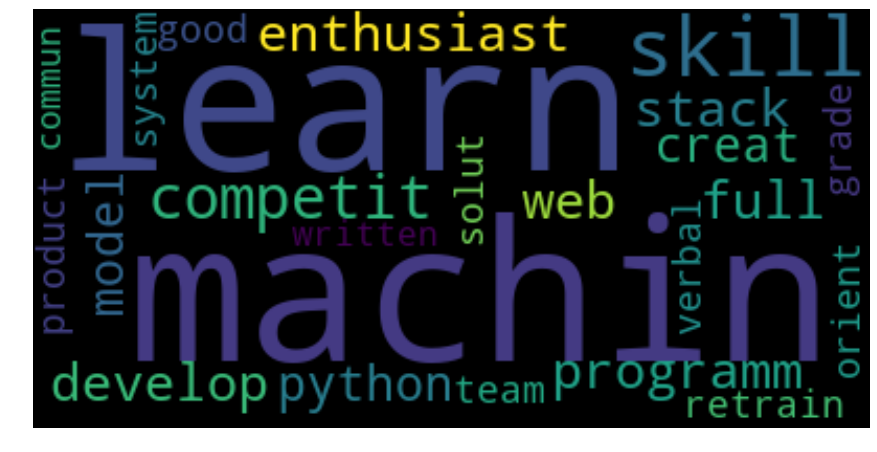

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud().generate(m)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

['mechan engin year experi lightweight materi innov product mainten possess b mechan engin uc san diego seek leverag solidwork expertis leadership abil materi develop compet role senior mechan engin']
[('e', 28), (' ', 28), ('i', 16), ('n', 15), ('a', 11), ('r', 11), ('o', 10), ('s', 10), ('t', 8), ('m', 7), ('g', 7), ('p', 7), ('l', 7), ('c', 6), ('h', 6), ('d', 5), ('v', 3), ('x', 2), ('w', 2), ('u', 2), ('b', 2), ('k', 2), ('y', 1)]


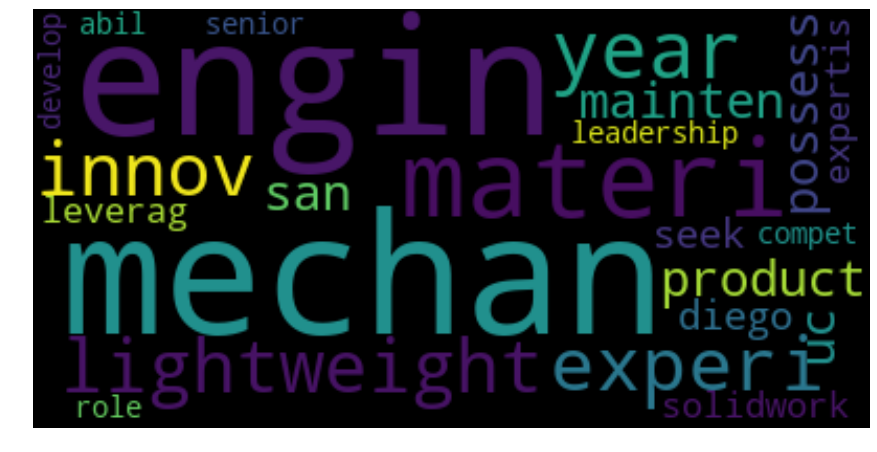

[5]


In [37]:
m='Mechanical Engineer with 6+ years of experience in lightweight materials innovation, production, and maintenance. Possess a B.S. in Mechanical Engineering from UC San Diego. Seeking to leverage my SolidWorks expertise, leadership abilities, and materials development competency in the role of Senior Mechanical Engineer.'
m = re.sub('[^a-zA-Z]',' ',m)
m = m.lower()
m = m.split()
ps=PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
m = [ps.stem(word) for word in m if not word in set(all_stopwords)]
m = ' '.join(m)
corpus_t=[m]
print(corpus_t)
wordfreqdist = nltk.FreqDist(m)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud().generate(m)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
test = cv.transform(corpus_t).toarray()
prediction = lr.predict(test)
print(prediction)

In [38]:
corpus_t

['mechan engin year experi lightweight materi innov product mainten possess b mechan engin uc san diego seek leverag solidwork expertis leadership abil materi develop compet role senior mechan engin']

In [39]:
test

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
prediction[0]

5

In [41]:
    if prediction[0]==0:
        x='Data Science'
    elif prediction[0]==1:
        x='HR'
    elif prediction[0]==2:
        x='Advocate'
    elif prediction[0]==3:
        x='Arts'
    elif prediction[0]==4:
        x='Web Designing'
    elif prediction[0]==5:
        x='Mechanical Engineer'
    elif prediction[0]==6:
        x='Sales'
    elif prediction[0]==7:
        x='Health and fitness'
    elif prediction[0]==8:
        x='Civil Engineer'
    elif prediction[0]==9:
        x='Java Developer'
    elif prediction[0]==10:
        x='Business Analyst'
    elif prediction[0]==11:
        x='SAP Developer'
    elif prediction[0]==12:
        x='Automation Testing'
    elif prediction[0]==13:
        x='Electrical Engineering'
    elif prediction[0]==14:
        x='Operations Manager'
    elif prediction[0]==15:
        x='Python Developer'
    elif prediction[0]==16:
        x='DevOps Engineer'
    elif prediction[0]==17:
        x='Network Security Engineer'
    elif prediction[0]==18:
        x='PMO'
    elif prediction[0]==19:
        x='Database'
    elif prediction[0]==20:
        x='Hadoop'
    elif prediction[0]==21:
        x='ETL Developer'
    elif prediction[0]==22:
        x='DotNet Developer'
    elif prediction[0]==23:
        x='Blockchain'
    elif prediction[0]==24:
        x='Testing'

In [42]:
print("Your Resume is predicted to be mostly towards "+x + ".")

Your Resume is predicted to be mostly towards Mechanical Engineer.


In [43]:
import pickle 
pickle.dump(lr,open('resume.pkl','wb'))

In [12]:
import tkinter
from tkinter import filedialog
import os

root = tkinter.Tk()
root.withdraw() #use to hide tkinter window

currdir = os.getcwd()
tempdir = filedialog.askopenfilenames()
if len(tempdir) > 0:
    print("You chose %s" % tempdir)

You chose C:/Users/Rituraj/OneDrive/Pictures/Certificates/Rituraj Resume.pdf


In [20]:
#pdf to text
import io
from PIL import Image
import pytesseract
from wand.image import Image as wi

pytesseract.pytesseract.tesseract_cmd = r"C:/Users/Rituraj/AppData/Local/Tesseract-OCR/tesseract.exe"
#print(tempdir[0])
p = wi(filename=tempdir[0])
pdfImg = p.convert('jpeg')
pdfImg.crop(width=100,height=100)
print(pdfImg)
imgb=[]
for img in pdfImg.sequence:
    page = wi(image=img)
    imgb.append(page.make_blob('jpeg'))

extract_t=[]
for i in imgb:
    im = Image.open(io.BytesIO(i))
    text=pytesseract.image_to_string(im,lang='eng')
    extract_t.append(text)
    
print(extract_t)
#print(tempdir[0])

<wand.image.Image: 140961a 'JPEG' (100x100)>
['Rituraj\n\x0c', 'skiuLs\n\nWork SAMPLES\n\n‘Attendence Manager Using Deep Leaming\nee 2020- Dee 2020\n\nThis is hackathon group Profct Based on using Face Recognition to take\nAttendance,\n\n‘Technical Content Writer\n\nSep2020- cst 2020\n\nhtps//eoders packet com/contributor/rtursjoctober\n\nIte the tink to my Publi hed codes as Technical Writer\n\n‘Travel India\n‘Aug 2020- Aug 2020,\n\nhttps:/Mightfareprediction910.herokuapp.comy\n\n“The Project is a machine Leaming focused on Predicting the fare ofthe Fights in\nInia\n\n‘Natural Language Processing\n\nJul2c20- Jul2020\n\nhtps://nlpmi-sentiment-analysés hewkuapp.com/\n\n“The Project is related to the Sentiment Analysis and Text Summatization in NLP\nFreedom Art\n\nMay2020- May2020,\n\nhttps://freedomrart.herokuapp.com/\n\n“The Project was created During Lockdown whereeveryone can come up with\ntheir Heas and innovation andcan upload tfor the publ. Everyonecan see and\nreview thelr inv at

In [11]:
#m='Competitive Programmer, Full Stack Web Developer, and Machine Learning Enthusiast skilled in Python creating machine learning models and retraining systems to production-grade solutions.Team-oriented with good verbal and written communication skills.'
m = re.sub('[^a-zA-Z]',' ',extract_t[0])
m = m.lower()
m = m.split()
ps=PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
m = [ps.stem(word) for word in m if not word in set(all_stopwords)]
m = ' '.join(m)
corpus_t=[m]
print(corpus_t)
test = cv.transform(corpus_t).toarray()
prediction = lr.predict(test)
print(prediction)

NameError: name 're' is not defined

In [99]:
    if prediction[0]==0:
        x='Data Science'
    elif prediction[0]==1:
        x='HR'
    elif prediction[0]==2:
        x='Advocate'
    elif prediction[0]==3:
        x='Arts'
    elif prediction[0]==4:
        x='Web Designing'
    elif prediction[0]==5:
        x='Mechanical Engineer'
    elif prediction[0]==6:
        x='Sales'
    elif prediction[0]==7:
        x='Health and fitness'
    elif prediction[0]==8:
        x='Civil Engineer'
    elif prediction[0]==9:
        x='Java Developer'
    elif prediction[0]==10:
        x='Business Analyst'
    elif prediction[0]==11:
        x='SAP Developer'
    elif prediction[0]==12:
        x='Automation Testing'
    elif prediction[0]==13:
        x='Electrical Engineering'
    elif prediction[0]==14:
        x='Operations Manager'
    elif prediction[0]==15:
        x='Python Developer'
    elif prediction[0]==16:
        x='DevOps Engineer'
    elif prediction[0]==17:
        x='Network Security Engineer'
    elif prediction[0]==18:
        x='PMO'
    elif prediction[0]==19:
        x='Database'
    elif prediction[0]==20:
        x='Hadoop'
    elif prediction[0]==21:
        x='ETL Developer'
    elif prediction[0]==22:
        x='DotNet Developer'
    elif prediction[0]==23:
        x='Blockchain'
    elif prediction[0]==24:
        x='Testing'

In [100]:
print("Your Resume is predicted to be mostly towards "+x + ".")

Your Resume is predicted to be mostly towards Python Developer.


In [101]:
print("Thanks for Seeing")

Thanks for Seeing


In [4]:
!pip install MannheimUniversityLibrary.TesseractOCR

ERROR: Could not find a version that satisfies the requirement MannheimUniversityLibrary.TesseractOCR (from versions: none)
ERROR: No matching distribution found for MannheimUniversityLibrary.TesseractOCR
You should consider upgrading via the 'c:\users\rituraj\anaconda3\python.exe -m pip install --upgrade pip' command.
